___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [90]:
df = pd.read_csv("Ready_to_ML.csv")

In [91]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [92]:
df.shape

(26711, 27)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [94]:
df.duplicated().sum()

1815

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.duplicated().sum()

0

In [97]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000,24896.000000
mean,23267.093067,67626.156910,1698.132150,5.774582,129.384751,1409.004820,1.458507,5.128213,117.265284,5.540101
std,20929.617776,61708.674086,789.478406,1.407822,54.363831,299.565866,0.849019,4.607968,66.075700,2.226174
min,490.000000,0.000000,0.000000,1.000000,0.000000,347.000000,1.000000,0.000000,33.000000,0.000000
25%,12480.000000,19000.000000,1242.000000,5.000000,106.000000,1205.000000,1.000000,2.000000,77.000000,4.300000
50%,17990.000000,52862.500000,1580.000000,6.000000,123.000000,1365.000000,1.000000,4.000000,97.000000,5.100000
75%,27900.000000,99532.250000,1969.000000,6.000000,150.000000,1575.000000,2.000000,7.000000,132.000000,6.400000
max,549000.000000,667128.000000,6300.000000,8.000000,399.000000,3150.000000,9.000000,20.000000,450.000000,18.300000


In [98]:
df.corr(numeric_only=True)

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000000,-0.389668,0.452135,0.193783,0.241257,0.580873,-0.181174,-0.394801,0.708968,0.251454
mileage,-0.389668,1.000000,0.129491,-0.025685,0.170655,0.004025,0.368222,0.731396,-0.095839,0.139659
engine_size,0.452135,0.129491,1.000000,0.249758,0.672491,0.559162,0.083194,0.194488,0.770654,0.671041
gears,0.193783,-0.025685,0.249758,1.000000,0.239586,0.290264,-0.048624,-0.090815,0.272957,0.174519
co_emissions,0.241257,0.170655,0.672491,0.239586,1.000000,0.326153,0.118931,0.317986,0.524973,0.812006
empty_weight,0.580873,0.004025,0.559162,0.290264,0.326153,1.000000,-0.049365,-0.073288,0.665614,0.299871
previous_owner,-0.181174,0.368222,0.083194,-0.048624,0.118931,-0.049365,1.000000,0.469071,-0.013652,0.139314
age,-0.394801,0.731396,0.194488,-0.090815,0.317986,-0.073288,0.469071,1.000000,-0.048920,0.342378
power_kW,0.708968,-0.095839,0.770654,0.272957,0.524973,0.665614,-0.013652,-0.048920,1.000000,0.569033
cons_avg,0.251454,0.139659,0.671041,0.174519,0.812006,0.299871,0.139314,0.342378,0.569033,1.000000


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

In [99]:
df["extras"]

0                                             Alloy wheels
1        Alloy wheels (21"), Shift paddles, Sport packa...
2                                             Alloy wheels
3                                              Sport seats
4                                             Alloy wheels
                               ...                        
26706                                         Alloy wheels
26707                    Alloy wheels (16"), Trailer hitch
26708    Alloy wheels, Automatically dimming interior m...
26709    Alloy wheels (18"), Automatically dimming inte...
26710    Alloy wheels, Automatically dimming interior m...
Name: extras, Length: 24896, dtype: object

In [100]:
df.extras.str.count(",").add(1)

0        1
1        6
2        1
3        1
4        1
        ..
26706    1
26707    2
26708    3
26709    2
26710    4
Name: extras, Length: 24896, dtype: int64

In [101]:
df["extras"].apply(lambda x: x.count(",")).add(1)

0        1
1        6
2        1
3        1
4        1
        ..
26706    1
26707    2
26708    3
26709    2
26710    4
Name: extras, Length: 24896, dtype: int64

### Converting the Extras feature from object to numeric

In [102]:
df["extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [103]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,1,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,6,2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,1,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,1,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,1,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [104]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

## multicollinearity control

In [105]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# This function will return the correlation between independent features coloured based on their correlation strength.
# If the correlation is between (-0.90, +0.90), the value will be coloured red, otherwise black.

# Linear models (linear regression, ridge, lasso, elasticnet, logistic regression) are badly affected by multicollinearity.
# Regularisation models handle this problem gracefully as well as the overfitting situation.

In [106]:
df.corr(numeric_only=True).style.applymap(color_red)

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000000,-0.389668,0.452135,0.193783,0.241257,0.310176,0.580873,-0.181174,-0.394801,0.708968,0.251454
mileage,-0.389668,1.000000,0.129491,-0.025685,0.170655,-0.180417,0.004025,0.368222,0.731396,-0.095839,0.139659
engine_size,0.452135,0.129491,1.000000,0.249758,0.672491,0.185866,0.559162,0.083194,0.194488,0.770654,0.671041
gears,0.193783,-0.025685,0.249758,1.000000,0.239586,0.187789,0.290264,-0.048624,-0.090815,0.272957,0.174519
co_emissions,0.241257,0.170655,0.672491,0.239586,1.000000,0.102581,0.326153,0.118931,0.317986,0.524973,0.812006
extras,0.310176,-0.180417,0.185866,0.187789,0.102581,1.000000,0.329707,-0.103110,-0.197873,0.312954,0.114886
empty_weight,0.580873,0.004025,0.559162,0.290264,0.326153,0.329707,1.000000,-0.049365,-0.073288,0.665614,0.299871
previous_owner,-0.181174,0.368222,0.083194,-0.048624,0.118931,-0.103110,-0.049365,1.000000,0.469071,-0.013652,0.139314
age,-0.394801,0.731396,0.194488,-0.090815,0.317986,-0.197873,-0.073288,0.469071,1.000000,-0.048920,0.342378
power_kW,0.708968,-0.095839,0.770654,0.272957,0.524973,0.312954,0.665614,-0.013652,-0.048920,1.000000,0.569033


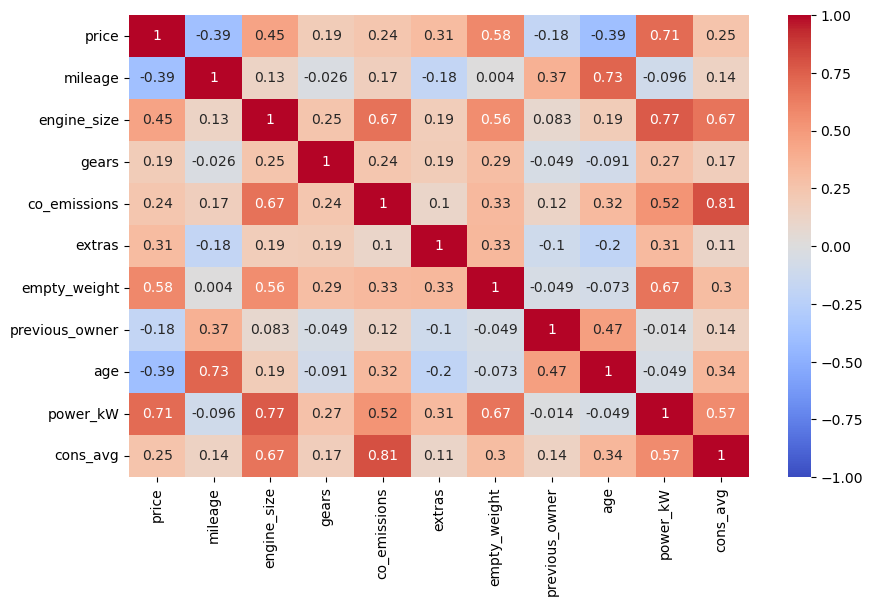

In [107]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
df_predictors = df.drop(columns=['price','make_model','body_type','type','warranty','gearbox','fuel_type','seller','drivetrain','full_service_history','upholstery','energy_efficiency_class','comfort_&_convenience_Package','entertainment_&_media_Package','safety_&_security_Package'])
predictors = df_predictors.columns

In [110]:
predictors

Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')

In [111]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [112]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [113]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,mileage,5.152793
1,engine_size,19.980641
2,gears,16.282661
3,co_emissions,22.145480
4,extras,2.964301
5,empty_weight,25.555071
6,previous_owner,4.811779
7,age,6.658917
8,power_kW,13.699919
9,cons_avg,24.588493


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = df.drop(columns="price", axis=1)
y = df["price"]

In [117]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (19916, 24)
Train target shape   :  (19916,)
Test features shape  :  (4980, 24)
Test target shape    :  (4980,)


## OneHotEncoder and OrdinalEncoder

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [118]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [119]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Cloth,efficient,Standard,Standard,Safety Premium Package


In [120]:
ordinal_features = ['type','comfort_&_convenience_Package','entertainment_&_media_Package','safety_&_security_Package']
onehot_features = ['energy_efficiency_class','make_model','body_type','gearbox','fuel_type','seller','warranty','drivetrain','upholstery','full_service_history']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [126]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_features), 
                        (OrdinalEncoder(categories=[cat_for_type, 
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), ordinal_features),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [127]:
X_transformed = column_trans.fit_transform(X)
print(X_transformed)

       energy_efficiency_class_efficient  energy_efficiency_class_unefficient  \
0                                    1.0                                  0.0   
1                                    1.0                                  0.0   
2                                    0.0                                  1.0   
3                                    0.0                                  1.0   
4                                    0.0                                  1.0   
...                                  ...                                  ...   
26706                                1.0                                  0.0   
26707                                1.0                                  0.0   
26708                                0.0                                  1.0   
26709                                1.0                                  0.0   
26710                                0.0                                  1.0   

       make_model_Dacia Bre

## Scaling

In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

# DataFrame'e dönüştürme (isteğe bağlı)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed.columns)
print(X_scaled_df)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
ls = train_val("linear", y_train, y_train_pred, y_test, y_pred)
ls

## Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)


# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

In [ ]:
scores
# The scores are returned as a dictionary.

In [ ]:
pd.DataFrame(scores, index = range(1,11))
# To make it easier to read, we turn the returned dictionary into a dataframe.

In [ ]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Return the mean of the metrics we got from cross validation.

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

# Comparing train and test scores to diagnose overfitting/underfitting is not too bad of a method, but if we strictly take the test set as a reference to tune our model,
# we will end up overestimating the model performance in the most optimistic/ambitious way. Trying to diagnose overfitting/underfitting from CV results
# is the best way to go about it.

# Also, CV tells us much more about the consistency and reliability of the model as well as different parts of the dataset.

In [ ]:
adj_r2(y_test, y_pred, X_test)

In [ ]:
lm.coef_

# We will assign the coefficients of each model to their own variables to compare
# how regularisation affects the coefficients later on.

In [ ]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

## Prediction Error

In [ ]:
residuals = y_test-y_pred

## Residual Plot

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# There are 2 very fundamental and important assumptions we make on our residuals:
# 1- They are normally distributed.
# 2- They are randomly spread around the mean of 0. (This phenomenon is called homoscedasticity)

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

In [ ]:
sns.kdeplot(residuals)
plt.show();

In [ ]:
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

# You can also check QQ-normality plot to check if residuals are normally distributed.

In [ ]:
from scipy.stats import skew
skew(residuals)

# Check the skewness of the residuals. This is another way of checking your data
# against normality, with a more formal mathematical calculation.
# If your skewness score is between [-1, 1], you could say that it's more or less normally distributed.
# 0 is the perfect score, means perfectly normally distributed, which you'll probably never get.

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# A much better way of visualising residuals is using `yellowbrick.regressor.ResidualsPlot`
# This saves us manual labour.
# yellowbrick is a great library specifically created to visualise scikit-learn models.

In [ ]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();


# On the x-axis, we've got the real target values, whereas on the y-axis, we've got the predicted target values.
# The greyed-out dashed line is the reference line, where predictions would meet our real target values should they be perfect.
# But they're not perfect. Hence, we have the black dashed line, showing how far apart our residuals from the ideal perfect.

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___